# Appendix F.4 Vienna General Hospital Temporal Comparison Calculations - 1831 to 1840

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from process_improvement import xmr_charts as xmr
from process_improvement import comparison_charts as cc

%matplotlib inline

## Step 1. Gather the data

In [2]:
# Get data
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Vienna url
temporal_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation/refs/heads/main/data/temporal-comparison-death-to-birth-rates.csv'

# Get data
temporal_df = get_data(temporal_url)

# Show first 10 lines
temporal_df.head(10)

# Show columns
temporal_df.columns

Index(['Hospital', 'Stage', 'Year', 'Births', 'Deaths', 'Rate', 'Note'], dtype='object')

### Drop  unnecessary columns from dataframe

In [3]:
temporal_df = temporal_df[['Hospital', 
                           'Stage', 
                           'Year', 
                           #'Births', 
                           #'Deaths', 
                           'Rate', 
                           #'Note' 
                          ]]

# Make 'Value' column dtype string
temporal_df['Year'] = temporal_df['Year'].astype('string').copy()

temporal_df.head()

,Hospital,Stage,Year,Rate
0,Vienna General Hospital,Period 1,1784,2.1
1,Vienna General Hospital,Period 1,1785,1.4
2,Vienna General Hospital,Period 1,1786,0.4
3,Vienna General Hospital,Period 1,1787,0.4
4,Vienna General Hospital,Period 1,1788,0.4


### Splite dataframe according to stage

In [9]:
# Create dataframe for 1784 to 1793
Vienna_P1_df = temporal_df[(temporal_df['Hospital'] == 'Vienna General Hospital') & (temporal_df['Stage'] == 'Period 1')].reset_index(drop=True).copy()
# Create dataframe for 1831 to 1840
Vienna_P2_df = temporal_df[(temporal_df['Hospital'] == 'Vienna General Hospital') & (temporal_df['Stage'] == 'Period 2')].reset_index(drop=True).copy()

## Step 2. Calculate the moving ranges for Dublin period 1 (1784 to 1793)

In [10]:
# Calculate the moving ranges for before_df
Vienna_P2_df['Moving Ranges'] = abs(Vienna_P2_df['Rate'].diff())
Vienna_P2_df

,Hospital,Stage,Year,Rate,Moving Ranges
0,Vienna General Hospital,Period 2,1831,6.6,NaN
1,Vienna General Hospital,Period 2,1832,3.2,3.4
2,Vienna General Hospital,Period 2,1833,5.3,2.1
3,Vienna General Hospital,Period 2,1834,7.7,2.4
4,Vienna General Hospital,Period 2,1835,5.6,2.1
5,Vienna General Hospital,Period 2,1836,7.5,1.9
6,Vienna General Hospital,Period 2,1837,9.1,1.6
7,Vienna General Hospital,Period 2,1838,3.0,6.1
8,Vienna General Hospital,Period 2,1839,5.4,2.4
9,Vienna General Hospital,Period 2,1840,9.2,3.8


## Step 3. Calculate the average moving range

In [11]:
# Calculate the average moving range for before_df['Moving Ranges']
Vienna_ave_mR = round(Vienna_P2_df['Moving Ranges'].mean(),2)
Vienna_ave_mR

2.87

## Step 4. Calculate the mean

In [12]:
# Calculate the mean before_df['Rate']
Vienna_mean = round(Vienna_P2_df['Rate'].mean(),2)
Vienna_mean

6.26

## Step 5. Calculate the process limits

In [13]:
# Upper Process Limit (UPL)
Vienna_UPL = round(Vienna_mean + (2.660*Vienna_ave_mR),2)
# Lower Process Limit (LPL)
Vienna_LPL_calc = round(Vienna_mean - (2.660*Vienna_ave_mR),2)
# Ensure that LPL is not negative
Vienna_LPL = max(0, Vienna_LPL_calc)
# Upper Process Limit (UPL)
Vienna_URL = round(3.268*Vienna_ave_mR,2)
# Show results
print('UPL:', Vienna_UPL)
print('Calculated LPL:', Vienna_LPL_calc)
print('LPL:', Vienna_LPL)
print('URL:', Vienna_URL)

UPL: 13.89
Calculated LPL: -1.37
LPL: 0
URL: 9.38


## Step 6. Put it all together

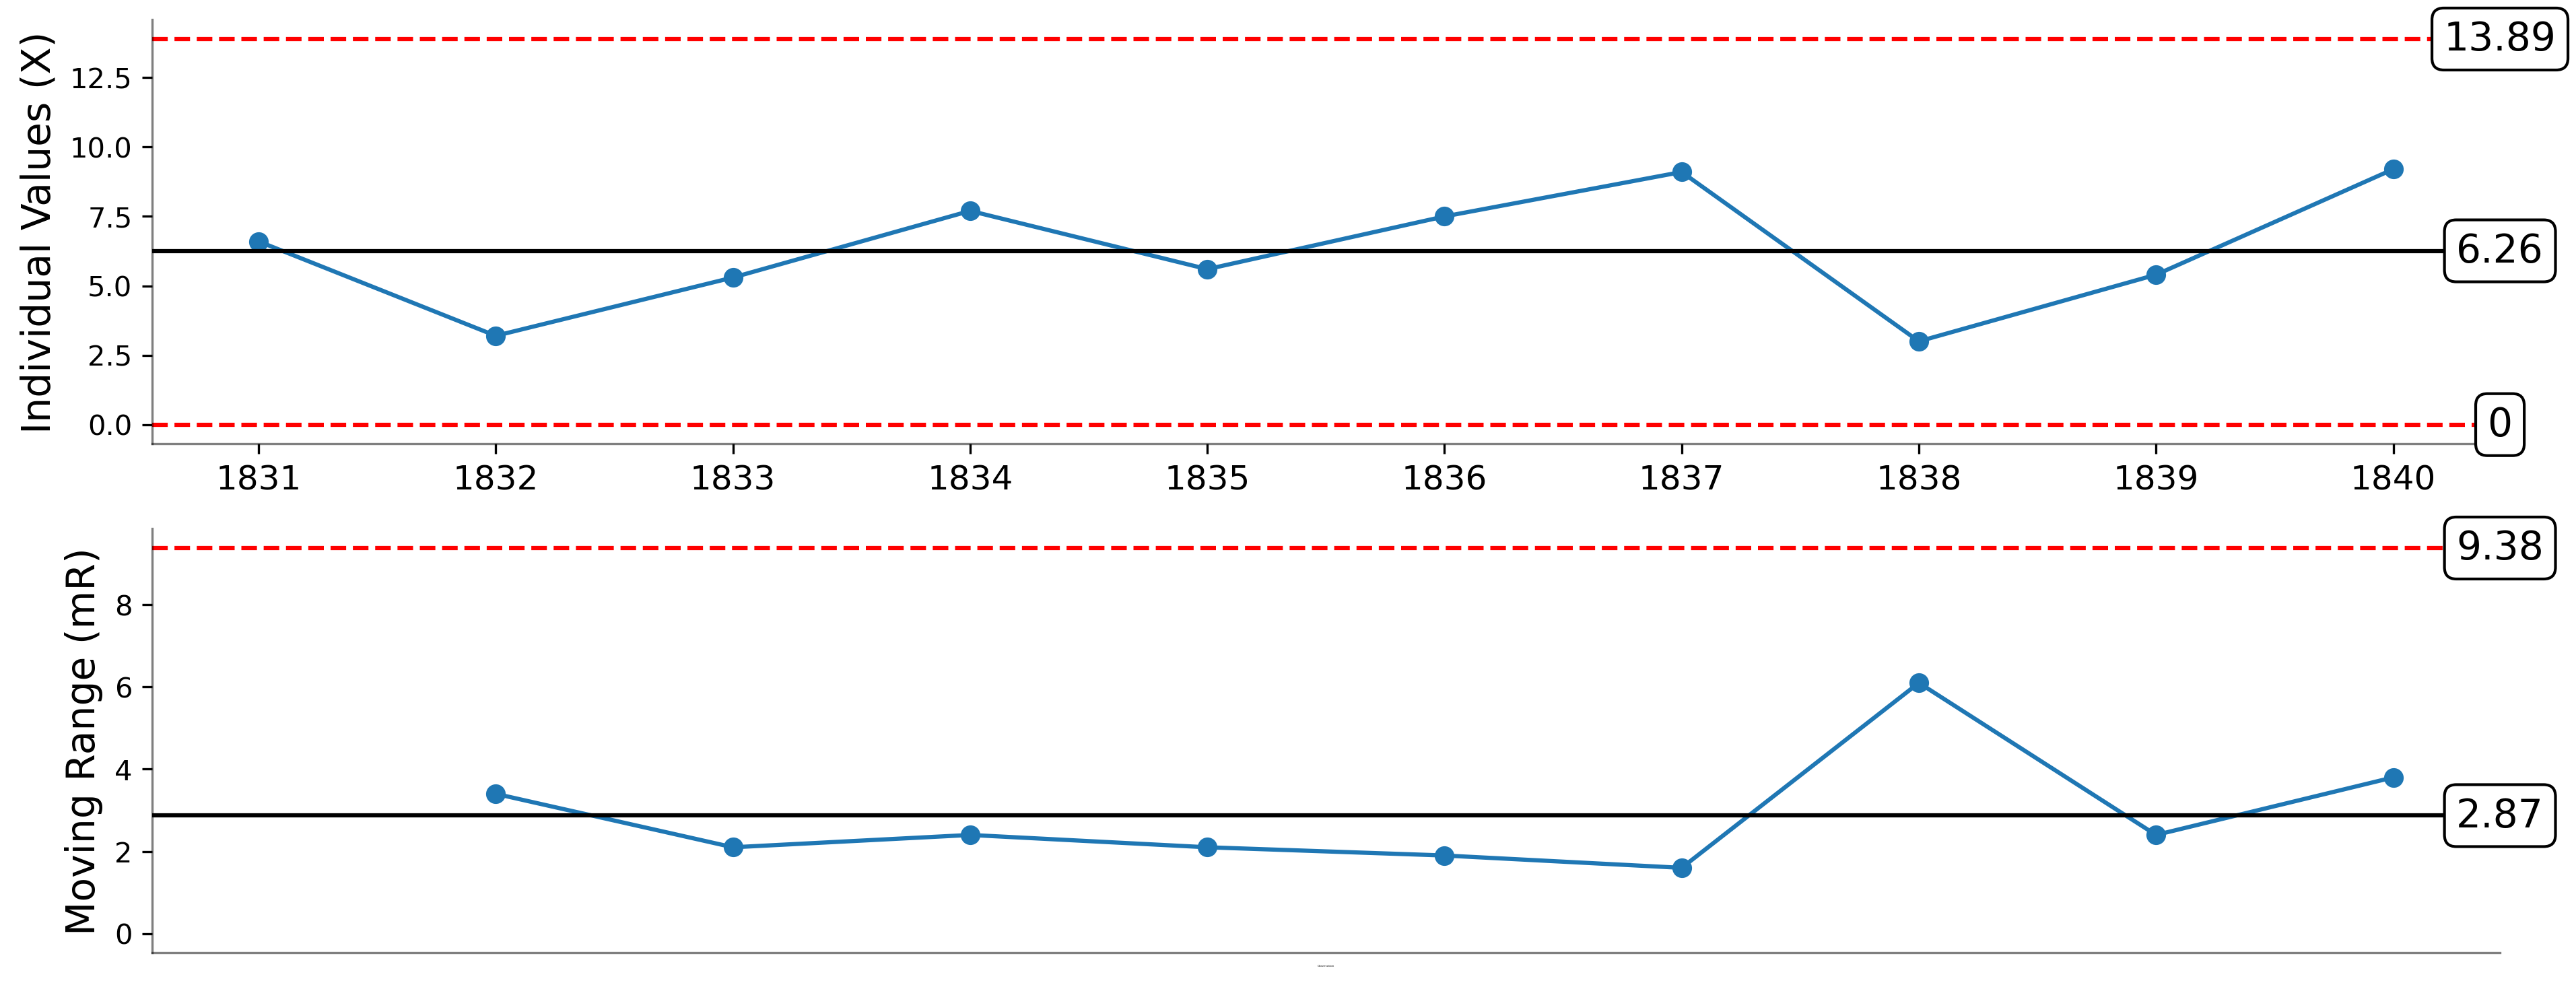

In [14]:
Vienna_results = xmr.xmr_chart(Vienna_P2_df,
                                'Rate',
                                'Year',
                                tickinterval=1, 
                                round_value=2, 
                                label_fontsize=14,
                                xtick_fontsize=12)